In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_excel('PhynetBuldout_from_Incidents1.xlsx')

In [104]:
#selecting only important column..

df = df[['IncidentId', 'SourceCreateDate', 'SourceModifiedDate', 'CreateDate',
       'ModifiedDate', 'ImpactStartDate', 'OccurringDatacenter',
       'RaisingDatacenter', 'OccurringDeviceName', 'Severity', 'Status',
       'IsNoise', 'IsSecurityRisk', 'IsCustomerImpacting', 'TsgId', 'Title',
       'ResolveDate', 'MitigateDate', 'ResolvedBy', 'MitigatedBy', 'HowFixed',
       'OwningTenantName', 'ResponsibleTenantName']]

In [ ]:
#df.info()
#df = pd.read_excel('Columnsubsetdata.xlsx')

In [105]:


'''
after checking all difference decided to go with createDate...
so drop all other 4 column because it all means same only..


#df["createDateDiff"] = df["CreateDate"]- df["SourceCreateDate"]
#df["modifiedDateDiff"] = df["ModifiedDate"]- df["SourceModifiedDate"]
#df["ImpactDateDiff"] = df["ImpactStartDate"]- df["SourceCreateDate"]
'''


df.drop(columns=['SourceCreateDate','SourceModifiedDate','ModifiedDate','ImpactStartDate'],inplace=True)


'''
As raisingDatacenter has more count as well as PHX not present in occuringDatacenter we decided to choose
raisingDatacenter.
'''

df.drop(columns=['OccurringDatacenter'],inplace=True)


'''
As mitigateddate data is more and difference between two date is minimal so we are going with mitigated date.

#df['resolvedatediff'] = df['ResolveDate'] - df['MitigateDate']

'''

df.drop(columns=['ResolveDate'],inplace=True)


'''
As mitigatedby data is more choosing mitigated by compared to resolved by
'''

df.drop(columns=['ResolvedBy'],inplace=True)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23353 entries, 0 to 23352
Data columns (total 16 columns):
IncidentId               23353 non-null int64
CreateDate               23353 non-null datetime64[ns]
RaisingDatacenter        17401 non-null object
OccurringDeviceName      18517 non-null object
Severity                 23353 non-null int64
Status                   23353 non-null object
IsNoise                  23353 non-null int64
IsSecurityRisk           23353 non-null int64
IsCustomerImpacting      23353 non-null int64
TsgId                    21093 non-null object
Title                    23353 non-null object
MitigateDate             4861 non-null datetime64[ns]
MitigatedBy              4896 non-null object
HowFixed                 5167 non-null object
OwningTenantName         23353 non-null object
ResponsibleTenantName    23353 non-null object
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 2.9+ MB


In [107]:
# converting in minutes because we need SLA in minutes only

df['SLA'] = (df['MitigateDate'] - df['CreateDate']).astype('timedelta64[m]')

In [108]:
df.describe()

IncidentId      Severity       IsNoise  IsSecurityRisk  \
count  2.335300e+04  23353.000000  23353.000000         23353.0   
mean   9.980804e+07      3.475999      0.000043             0.0   
std    3.802602e+06      0.513554      0.006544             0.0   
min    9.398681e+07      2.000000      0.000000             0.0   
25%    9.621660e+07      3.000000      0.000000             0.0   
50%    9.955558e+07      3.000000      0.000000             0.0   
75%    1.029693e+08      4.000000      0.000000             0.0   
max    1.070052e+08      4.000000      1.000000             0.0   

       IsCustomerImpacting           SLA  
count         23353.000000   4861.000000  
mean              0.006380   4253.650689  
std               0.079623   6540.896853  
min               0.000000      1.000000  
25%               0.000000    470.000000  
50%               0.000000   1838.000000  
75%               0.000000   6323.000000  
max               1.000000  69595.000000

In [109]:
# we need to perform operation on severity and sla so need to separate out those columns in dataframe 
temp_SLA = df[~df.SLA.isnull()][['Severity','SLA']]

In [110]:
temp_SLA = pd.DataFrame(temp_SLA,columns=['Severity','SLA'])

In [112]:
#calculating severity aggregate function using list..

minimum_value = []
maximum_value = []
mode_value = []
mean_value = []
median_value = []

for i in severity_value:
    temp = temp_SLA[temp_SLA.Severity == i]
    minimum_value.append(np.min(temp['SLA']))
    maximum_value.append(np.max(temp['SLA']))
    mean_value.append(np.mean(temp['SLA']))
    median_value.append(np.median(temp['SLA']))
    mode_value.append(temp['SLA'].mode())

In [113]:
#concatenate all severity value in a dataframe so we can showcase properly.

severity_pivot = pd.concat([pd.DataFrame(minimum_value),pd.DataFrame(maximum_value), \
           pd.DataFrame(mean_value),pd.DataFrame(median_value),pd.DataFrame(mode_value)],axis=1,)

In [114]:
#change column name , index and divide by 60 for converting in hours and showcase as pivot data.

severity_pivot.columns = ['min','max','mean','median','mode']
severity_pivot.index = [4,3,2]
severity_pivot = severity_pivot/60

In [115]:
df.OwningTenantName.value_counts()

Cloudnet                                    21092
MCIO Cloud Operations Platform Services       940
Network Graph Generator Workflow Service      819
Autopilot Service Escalations                 278
Azure Capacity Infrastructure Service         145
Windows Azure Hardware RMA                     18
Azure Hardware Datacenter Manager              15
Network Operations                             15
Xstore                                         14
Compute Manager                                 6
Global Ecosystem Buildout Team                  5
Windows Azure Operations Center                 3
OneFleet Node                                   2
Network Delivery Services                       1
Name: OwningTenantName, dtype: int64

In [116]:
df.ResponsibleTenantName.value_counts()

Cloudnet                                    18862
MCIO Cloud Operations Platform Services      2668
Network Graph Generator Workflow Service     1242
Azure Capacity Infrastructure Service         329
Autopilot Service Escalations                  77
Geneva Monitoring                              47
Windows Azure Hardware RMA                     42
OneFleet Node                                  31
Azure Hardware Datacenter Manager              24
Xstore                                         19
Azure Buildout SRE                              8
Compute Manager                                 4
Name: ResponsibleTenantName, dtype: int64

In [117]:
#calculate dataframe which have mitigate value otherwise discard...

df_full = df[~df.MitigateDate.isnull()]

In [118]:
#removing duplicate across all records and keeping last value only...

df_full = df_full[~df_full.duplicated(keep='last')]

In [119]:
#save for future re
df_full.to_excel('Subset_without_null.xlsx')

In [120]:
#missing values in occuring device name when mitigate value is present..
df_full.OccurringDeviceName.isnull().sum()

663

In [121]:
df_full.duplicated().sum()

0

# Usecase 1 finding Potentially failing #network device

In [144]:
#creating dataset for usecase1 and usecase2 as in that scanario we need to count on unique incidents.
df_usecase12 = df_full.copy()
df_usecase12 = df_full.drop_duplicates(subset=['IncidentId'])

In [122]:
#checking top20 count of occuring device name and plotting it..

occuring_hist = df_usecase12.OccurringDeviceName.value_counts().head(20)
occuring_hist = occuring_hist.to_frame()
occuring_hist.columns = ['occuring_value']
occuring_hist['occuring_name'] = occuring_hist.index
occuring_hist.reset_index(drop=True,inplace=True)

In [145]:
occuring_hist

occuring_value                   occuring_name
0              204  AlertBoxDeviceNameForSeverity3
1               91                  CO2PrdApp04-02
2               55                         2432835
3               47             USSouthCentral-RNG2
4               32                     BLAPrdHPC02
5               29                     SN1PrdStr02
6               29             USSouthCentral-RNG1
7               29                 EuropeWest-RNG2
8               26                   AMS20PrdHPC01
9               25                   MWH02PrdApp13
10              24                   LON23PrdStr03
11              24                MWH02PrdApp08-04
12              23                LON24PrdApp01-01
13              22                  BLAPrdApp19-03
14              21                  BL2PrdApp25-01
15              20                  BN8PrdApp08-01
16              20                          AMS02P
17              16                     CO2PrdApp10
18              16                            CO01
19              14                            OS1P

[Text(0, 0, 'AlertBoxDeviceNameForSeverity3'),
 Text(0, 0, 'CO2PrdApp04-02'),
 Text(0, 0, '2432835'),
 Text(0, 0, 'USSouthCentral-RNG2'),
 Text(0, 0, 'BLAPrdHPC02'),
 Text(0, 0, 'SN1PrdStr02'),
 Text(0, 0, 'USSouthCentral-RNG1'),
 Text(0, 0, 'EuropeWest-RNG2'),
 Text(0, 0, 'AMS20PrdHPC01'),
 Text(0, 0, 'MWH02PrdApp13'),
 Text(0, 0, 'LON23PrdStr03'),
 Text(0, 0, 'MWH02PrdApp08-04'),
 Text(0, 0, 'LON24PrdApp01-01'),
 Text(0, 0, 'BLAPrdApp19-03'),
 Text(0, 0, 'BL2PrdApp25-01'),
 Text(0, 0, 'BN8PrdApp08-01'),
 Text(0, 0, 'AMS02P'),
 Text(0, 0, 'CO2PrdApp10'),
 Text(0, 0, 'CO01'),
 Text(0, 0, 'OS1P')]

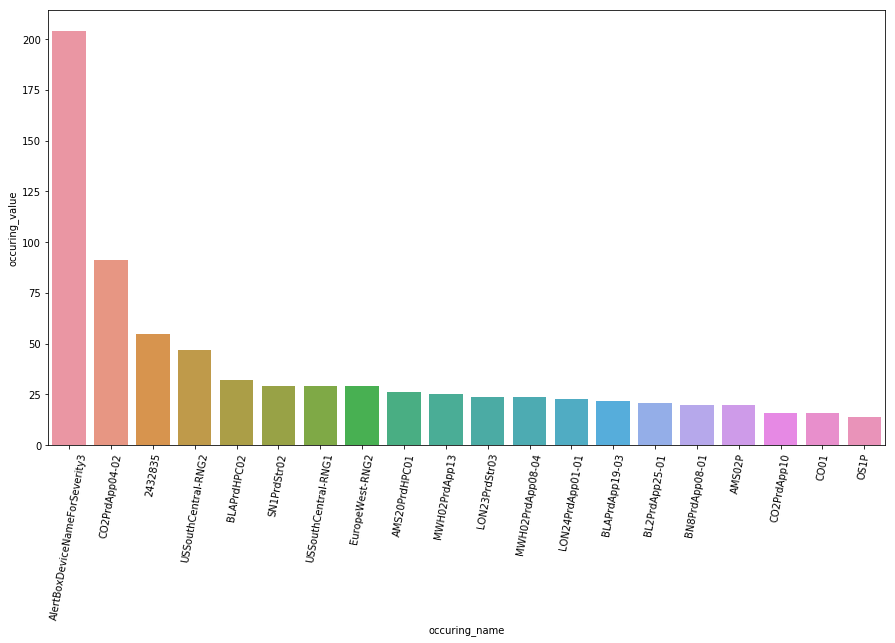

In [146]:
plt.figure(figsize=(15,8))
ax = sns.barplot(occuring_hist.occuring_name,occuring_hist.occuring_value)
ax.set_xticklabels(occuring_hist.occuring_name,rotation=80)

# Usecase2 Potentially  network degrading #datacenter

In [148]:
#missing values in raising data center when mitigate value is present..
df_full.RaisingDatacenter.isnull().sum()

705

In [149]:
#checking top20 raising data center and plotting it...

raising_hist = df_usecase12.RaisingDatacenter.value_counts().head(20)
raising_hist = raising_hist.to_frame()
raising_hist.columns = ['raising_value']
raising_hist['raising_name'] = raising_hist.index
raising_hist.reset_index(drop=True,inplace=True)

[Text(0, 0, 'PHX'),
 Text(0, 0, 'CO2'),
 Text(0, 0, 'BY5'),
 Text(0, 0, 'BL20'),
 Text(0, 0, 'AMS20'),
 Text(0, 0, 'MWH02'),
 Text(0, 0, 'SN6'),
 Text(0, 0, 'BN1'),
 Text(0, 0, 'BN8'),
 Text(0, 0, 'SN1'),
 Text(0, 0, 'CO5'),
 Text(0, 0, 'DSM06'),
 Text(0, 0, 'LON24'),
 Text(0, 0, 'BL2'),
 Text(0, 0, 'CHI21'),
 Text(0, 0, 'CPQ20'),
 Text(0, 0, 'DSM08'),
 Text(0, 0, 'SG2'),
 Text(0, 0, 'AMS06'),
 Text(0, 0, 'OSA21')]

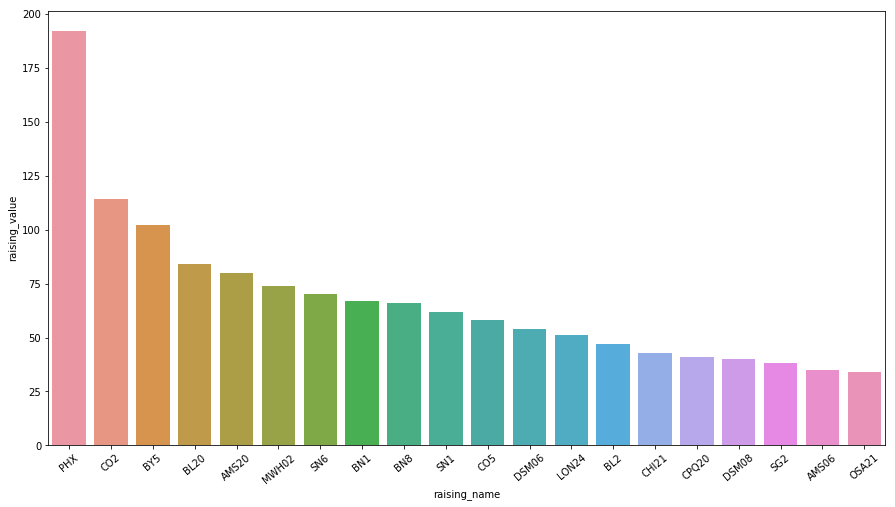

In [150]:
plt.figure(figsize=(15,8))
ax1 = sns.barplot(raising_hist.raising_name,raising_hist.raising_value)
ax1.set_xticklabels(raising_hist.raising_name,rotation=40)

# Usecase 3 Recommended #tsg for a given incident

In [151]:
df_full.head(5)

IncidentId          CreateDate RaisingDatacenter OccurringDeviceName  \
5     93986810 2018-12-01 00:12:05             AMS21     EuropeWest-RNG2   
10    93986903 2018-12-01 00:12:37               BY5           FID297137   
15    93987770 2018-12-01 00:17:27             PUS20             2317284   
23    93990329 2018-12-01 00:30:25             LON22       LON22PrdStr02   
32    93993495 2018-12-01 00:49:07             AMS21     EuropeWest-RNG2   

    Severity    Status  IsNoise  IsSecurityRisk  IsCustomerImpacting  \
5          4  RESOLVED        0               0                    0   
10         4  RESOLVED        0               0                    0   
15         4  RESOLVED        0               0                    0   
23         3  RESOLVED        0               0                    0   
32         3  RESOLVED        0               0                    0   

                                                TsgId  \
5   https://aka.ms/PhyNet_Build_TSG ; https://aka....   
10  https://aka.ms/PhyNet_Build_TSG ; https://aka....   
15  https://aka.ms/PhyNet_Build_TSG ; https://aka....   
23  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...   
32  https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka...   

                                                Title        MitigateDate  \
5   ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-01 04:54:20   
10  ['FID297137'] deployment blocked: NetworkProvi... 2018-12-01 04:14:18   
15  ['2317284'] deployment blocked: NetworkProvisi... 2018-12-01 05:20:45   
23  ['LON22PrdStr02'] deployment blocked: NetworkP... 2018-12-05 14:50:37   
32  ['EuropeWest-RNG2'] deployment blocked: Networ... 2018-12-03 09:11:56   

   MitigatedBy             HowFixed OwningTenantName ResponsibleTenantName  \
5     v-diindu          False Alarm         Cloudnet              Cloudnet   
10    v-rorajp            By Design         Cloudnet              Cloudnet   
15    v-hancha          False Alarm         Cloudnet              Cloudnet   
23   v-ajreddy            By Design         Cloudnet              Cloudnet   
32    v-ankigu  Fixed by Automation         Cloudnet              Cloudnet   

       SLA  
5    282.0  
10   241.0  
15   303.0  
23  6620.0  
32  3382.0

In [152]:
Tsg_df = df.iloc[:,[2,3,4,8,9,14,15]]
Tsg_df.head()

RaisingDatacenter OccurringDeviceName  Severity  IsCustomerImpacting  \
0             AMS21     EuropeWest-RNG2         4                    0   
1             AMS21     EuropeWest-RNG2         4                    0   
2             AMS21     EuropeWest-RNG2         4                    0   
3             AMS21     EuropeWest-RNG2         4                    0   
4             AMS21     EuropeWest-RNG2         4                    0   

                                               TsgId OwningTenantName  \
0  https://aka.ms/PhyNet_Build_TSG ; https://aka....         Cloudnet   
1  https://aka.ms/PhyNet_Build_TSG ; https://aka....         Cloudnet   
2  https://aka.ms/PhyNet_Build_TSG ; https://aka....         Cloudnet   
3  https://aka.ms/PhyNet_Build_TSG ; https://aka....         Cloudnet   
4  https://aka.ms/PhyNet_Build_TSG ; https://aka....         Cloudnet   

  ResponsibleTenantName  
0              Cloudnet  
1              Cloudnet  
2              Cloudnet  
3              Cloudnet  
4              Cloudnet

In [87]:
Tsg_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
y = Tsg_df['TsgId']
X = Tsg_df.drop(columns=['TsgId'])

In [89]:
y.value_counts()

Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https://aka.ms/AzureWiki_PhyNet_Build_TSG    6124
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNet_Build_TSG                           3793
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNet_Build_TSG                          1581
Onenote - https://aka.ms/PhyNet_Build_TSG ;  AzureWiki - https:/                                        70
https://aka.ms/PhyNet_Build_TSG ;\nhttps://aka.ms/AzureWiki_PhyNe                                       36
https://aka.ms/PhyNet_Build_TSG ; https://aka.ms/AzureWiki_PhyNe                                        26
https://aka.ms/PhyNet_Build_TSG ; \n https://aka.ms/AzureWiki_PhyNet_Build_TSG                           7
Name: TsgId, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error,r2_score

In [91]:
label_index = ['RaisingDatacenter','OccurringDeviceName','OwningTenantName','ResponsibleTenantName']

for i in label_index:
    X[i] = LabelEncoder().fit_transform(X[i])

In [92]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [93]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
# confusion_tsg_test = confusion_matrix(y_test,rf.predict(X_test)).T
# confusion_tsg_test
confusion_tsg_test = pd.crosstab(y_test, rf.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True).T
confusion_tsg_test

True        0     1   2    3  4  5     6   All
Predicted                                     
0          12     0   0    0  0  0     0    12
1           4  1727   9  120  0  0   106  1966
3           0    46   1  307  0  2    25   381
4           0     4   0    0  2  0     2     8
5           0     0   0    1  0  4     4     9
6           2    51   0   31  0  1  1031  1116
All        18  1828  10  459  2  7  1168  3492

In [98]:
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True).T
# confusion_tsg_train = confusion_matrix(y_train,rf.predict(X_train)).T
# confusion_tsg_train

confusion_tsg_train = pd.crosstab(y_train, rf.predict(X_train), rownames=['True'], colnames=['Predicted'], margins=True).T
confusion_tsg_train

True        0     1   2     3  4   5     6   All
Predicted                                       
0          32     1   0     0  0   0     0    33
1          13  4092  23   260  0   0   189  4577
2           0     0   1     0  0   0     0     1
3           0   119   1   760  0   2    49   931
4           0     5   0     2  5   0     4    16
5           0     0   0     0  0  13     0    13
6           7    79   1   100  0   4  2383  2574
All        52  4296  26  1122  5  19  2625  8145

In [101]:
print("f1-score for train tsg id = ",f1_score(y_train,rf.predict(X_train),average='macro'))
print("f1-score for test tsg id = ",f1_score(y_test,rf.predict(X_test),average='macro'))

f1-score for train tsg id =  0.6707355870967918
f1-score for test tsg id =  0.6063056143803512


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Use Case 4 finding right engineer for incident to be routed.

In [ ]:
df_second = pd.read_excel('Subset_without_null_with_order.xlsx')

In [ ]:
df_second.head()

In [ ]:
#selecting only important column respectively..
df_second_usecase = df_second.iloc[:,[2,3,4,8,9,14,17]]

In [ ]:
#drop if any null value contain in dataset..

df_second_usecase.dropna(inplace=True)

In [ ]:
#take target and feature variable separately..

X_sec = df_second_usecase.iloc[:,0:-1]
y_sec = df_second_usecase.iloc[:,-1]

In [ ]:
#converting categorical value into integer value...

label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','OwningTenantName']

for i in label_index:
    X_sec[i] = LabelEncoder().fit_transform(X_sec[i])

In [ ]:
#train test split..
seed = 123
X_sec_train, X_sec_test, y_sec_train, y_sec_test = train_test_split(X_sec, y_sec, test_size=0.30, random_state=42)

In [ ]:
#random forest classifier fit.

rf = RandomForestClassifier()
rf.fit(X_sec_train,y_sec_train)

In [ ]:
#train dataset prediction 
y_sec_train_pred = rf.predict(X_sec_train)

#test data set prediction
y_sec_test_pred = rf.predict(X_sec_test)

In [ ]:
#confusion matrix for train data set..
confusion_train = confusion_matrix(y_sec_train,y_sec_train_pred)

#confusion matrix for test data set..
confusion_test = confusion_matrix(y_sec_test,y_sec_test_pred)

In [ ]:
print("confusion matrix order....predicted vs truth")

print("\nconfusion matrix for train data.......\n")
print(confusion_train)
print("======================================================\n")
print("confusion matrix for test data..............\n")
print(confusion_test)

In [ ]:
#f1-score for train dataset..
print("train data F1-score=",f1_score(y_sec_train,y_sec_train_pred,average='macro'))

#f1-score for test dataset..
print("test data F1-score=",f1_score(y_sec_test,y_sec_test_pred,average='macro'))


# use case 5 recommending SLA

In [ ]:
df_third = df_second.copy()

In [ ]:
#selecting only important column respectively..
df_third_usecase = df_third.iloc[:,[2,3,4,8,9,14,16]]

In [ ]:
df_third_usecase.head()

In [ ]:
#drop if any null value contain in dataset..

df_third_usecase.dropna(inplace=True)

In [ ]:
#take target and feature variable separately..

X_third = df_third_usecase.iloc[:,0:-1]
y_third = df_third_usecase.iloc[:,-1]

In [ ]:
#converting categorical value into integer value...

label_index = ['RaisingDatacenter','OccurringDeviceName','TsgId','OwningTenantName']

for i in label_index:
    X_third[i] = LabelEncoder().fit_transform(X_third[i])

In [ ]:
#train test split..
seed = 123
X_third_train, X_third_test, y_third_train, y_third_test = train_test_split(X_third, \
                                                           y_third, test_size=0.30, random_state=42)

In [ ]:
X_third_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_third_train,y_third_train)      

In [ ]:
print("Random forest output\n")

print("RMSE for training data set")
print(np.sqrt(mean_squared_error(y_third_train,rf_reg.predict(X_third_train))))

print("==========================\n")

print("RMSE for Test data set")
print(np.sqrt(mean_squared_error(y_third_test,rf_reg.predict(X_third_test))))

print("==========================\n")

print("R2 for training Dataset")
print(r2_score(y_third_train,rf_reg.predict(X_third_train)))

print("==========================\n")

print("R2 for test Dataset")
print(r2_score(y_third_test,rf_reg.predict(X_third_test)))

In [ ]:
from xgboost import XGBRegressor

# fit model no training data
xgb = XGBRegressor()
xgb.fit(X_third_train, y_third_train)

In [ ]:
y_third_xgb_pred = xgb.predict(X_third_test)

In [ ]:
print("XGBOOST  output\n")

print("RMSE for training data set")
print(np.sqrt(mean_squared_error(y_third_train,xgb.predict(X_third_train))))

print("==========================\n")

print("RMSE for Test data set")
print(np.sqrt(mean_squared_error(y_third_test,xgb.predict(X_third_test))))

print("==========================\n")

print("R2 for training Dataset")
print(r2_score(y_third_train,xgb.predict(X_third_train)))

print("==========================\n")

print("R2 for test Dataset")
print(r2_score(y_third_test,xgb.predict(X_third_test)))